## Load agent and show rout

In [128]:
%reload_ext autoreload
%autoreload 2
import dpu_clf
import gym

seed = 1345
env_kwargs = {
    "render_mode": "rgb_array",
    "num_levels": 0,
    "start_level": 0,
    "distribution_mode": "easy",
    "rand_seed": seed,
    "use_discrete_action_wrapper": True, 
    "use_stay_bonus_wrapper": False,
    'food_diversity': 4,
    'fruitbot_num_walls': 3,
    'fruitbot_num_good_min': 7,
    'fruitbot_num_good_range': 1,
    'fruitbot_num_bad_min': 5,
    'fruitbot_num_bad_range': 1,
    'fruitbot_wall_gap_pct': 60,
    'fruitbot_door_prob_pct': 0,
    }


env = gym.make("procgen:procgen-fruitbot-v0", **env_kwargs)
# obs, _ = env.reset()
model_path = "models\\fruitbot\\20251225-155401_hard\\ppo_final.zip" # hard
model_path2 = "models\\fruitbot\\20251225-000925_easy\\ppo_final.zip" # easy
model_path3 = "models\\fruitbot\\20251126-215809_easy\\ppo_final.zip" # easy old
agent_easy = dpu_clf.load_agent(None, model_path2)
agent_hard = dpu_clf.load_agent(None, model_path)
agent_easy_old = dpu_clf.load_agent(None, model_path3)
frames_jumps = 5


Using prebuilt binaries from: c:\Users\matan\master_thesis\rl_envs\procgen\procgen\.build\relwithdebinfo\RelWithDebInfo
Successfully loaded model from models\fruitbot\20251225-000925_easy\ppo_final.zip
Successfully loaded model from models\fruitbot\20251225-155401_hard\ppo_final.zip
Successfully loaded model from models\fruitbot\20251126-215809_easy\ppo_final.zip


In [129]:
frames, frames_indexes, collect_indexes, wall_collision_index, collisions = dpu_clf.record_frames(env, agent_hard, frames_jumps=frames_jumps)
print(f"len(frames)={len(frames)}")
print(f"frames_indexes={frames_indexes}")
print(f"collect_indexes={collect_indexes}")
print(f"wall_collision_index={wall_collision_index}")
print(f"collisions={collisions}")

len(frames)=22
frames_indexes=[0, 2, 4, 5, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
collect_indexes=[11]
wall_collision_index=28
collisions=[{'step': 11, 'x': 0.3757075, 'y': 0.13179025, 'collision_type': 7}]


In [130]:
from IPython.display import display

# for i, frame in enumerate(frames):
#     print(f"Frame {i}:")
#     display(frame)



Image original dimensions: width=512, height=512
Collision at normalized coords: (0.376, 0.132) -> pixel coords: (192, 373)


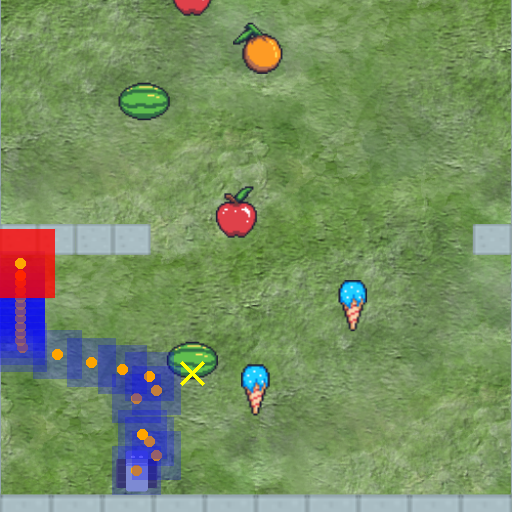

In [131]:
from IPython.display import display
import dpu_clf
len(frames)
full_path, clean_image = dpu_clf.draw_full_path(frames, frames_indexes=frames_indexes, collect_indexes=collect_indexes, collisions=collisions, frames_jumps=frames_jupms, wall_collision_index=wall_collision_index, use_rectangle=True)
display(full_path)


## Test collision detection and draw_collision_on_image

In [132]:
# import dpu_clf
# from IPython.display import display
# from PIL import Image
# import numpy as np

# # Create a new environment to test collision detection
# test_env = gym.make("procgen:procgen-fruitbot-v0", **env_kwargs)
# obs = test_env.reset()
# if isinstance(obs, tuple):
#     obs = obs[0]

# done = False
# step_count = 0
# collision_count = 0
# max_collisions = 10  # Show up to 10 collisions

# print("Running agent and collecting all collisions...")

# # Store previous frame from info
# prev_frame = None
# prev_agent_y = None

# while not done and step_count < 1000 and collision_count < max_collisions:
#     # Get agent action
#     action, _ = agent.predict(obs, deterministic=True)
#     action = action.item() if hasattr(action, 'item') else int(action)
    
#     # Step environment
#     result = test_env.step(action)
#     if len(result) == 5:
#         obs, reward, terminated, truncated, info = result
#         done = terminated or truncated
#     else:
#         obs, reward, done, info = result
    
#     step_count += 1
    
#     # Get current frame from info
#     current_frame = info.get('rgb', obs)
#     current_agent_y = info.get('agent_y', 0)
    
#     # Check for collision
#     if info.get('collision_type', 0) > 0:
#         collision_count += 1
#         collision_x = float(info['collision_x'])
#         collision_y = float(info['collision_y'])
#         collision_type = int(info['collision_type'])
#         agent_y = float(info.get('agent_y', 0))
        
#         # Use previous frame as "before" (if available)
#         if prev_frame is not None:
#             before_frame = prev_frame
#         else:
#             # If no previous frame, use current frame
#             before_frame = current_frame
        
#         # Convert frames to PIL Images
#         if isinstance(before_frame, np.ndarray):
#             before_img = Image.fromarray(before_frame).convert('RGB').resize((512, 512))
#         else:
#             before_img = before_frame.resize((512, 512)) if hasattr(before_frame, 'resize') else before_frame
        
#         if isinstance(current_frame, np.ndarray):
#             after_img = Image.fromarray(current_frame).convert('RGB').resize((512, 512))
#         else:
#             after_img = current_frame.resize((512, 512)) if hasattr(current_frame, 'resize') else current_frame
        
#         # Map collision type to name
#         collision_names = {
#             1: 'BARRIER (Wall)',
#             4: 'BAD_OBJ (Bad Fruit)',
#             7: 'GOOD_OBJ (Good Fruit)',
#             10: 'LOCKED_DOOR',
#             12: 'PRESENT (Goal)'
#         }
#         collision_name = collision_names.get(collision_type, f'Unknown ({collision_type})')
        
#         print(f"\n{'='*70}")
#         print(f"COLLISION #{collision_count} at step {step_count}")
#         print(f"  Type: {collision_name}")
#         print(f"  World coordinates: ({collision_x:.2f}, {collision_y:.2f})")
#         print(f"  Agent Y: {agent_y:.2f}")
#         print(f"  Reward: {reward:.2f}")
#         print(f"{'='*70}")
        
#         # Draw collision marker on the after image
#         marked_image = dpu_clf.draw_collision_on_image(
#             image=after_img,
#             collision_x=collision_x,
#             collision_y=collision_y + agent_y,
#             agent_y=agent_y,
#             main_width=10,  # easy mode
#             main_height=20,
#             res=64,
#             marker_size=20,
#             marker_color=(255, 255, 0, 255)  # Yellow
#         )
        
#         print("\n📷 BEFORE collision (previous frame):")
#         display(before_img)
        
#         print(f"\n⚠️ AFTER collision with marker (yellow X at world coords {collision_x:.2f}, {collision_y:.2f}):")
#         display(marked_image)
        
#         print(f"\n{'-'*70}\n")
    
#     # Store current frame as previous for next iteration
#     prev_frame = current_frame.copy() if isinstance(current_frame, np.ndarray) else current_frame
#     prev_agent_y = current_agent_y

# print(f"\n{'='*70}")
# print(f"Summary: Found {collision_count} collision(s) in {step_count} steps")
# if done:
#     print("Episode ended.")
# elif collision_count >= max_collisions:
#     print(f"Stopped after collecting {max_collisions} collisions.")
# print(f"{'='*70}")

# test_env.close()

In [133]:
# for i, frame in enumerate(frames):
#     print(f"Frame {i}:")
#     display(frame)